In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from IPython.display import display

In [0]:
# !unzip -q ml-100k.zip
# !rm ml-100k.zip

In [0]:
#Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')

#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', \
          'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', \
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', \
          'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1')

In [10]:
users['user_id'] = users['user_id'].astype('object')
users['age'] = users['age'].astype(np.int8)
users.drop(columns=['zip_code'], inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
user_id       943 non-null object
age           943 non-null int8
sex           943 non-null object
occupation    943 non-null object
dtypes: int8(1), object(3)
memory usage: 23.1+ KB


In [11]:
display(users.describe(exclude='object'))
display(users.describe(include='object'))

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


,user_id,sex,occupation
count,943,943,943
unique,943,2,21
top,943,M,student
freq,1,670,196


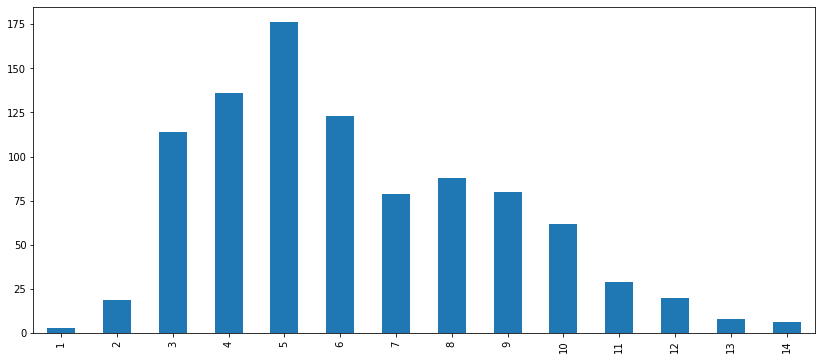

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
users['age'] = KBinsDiscretizer(n_bins=14, encode='ordinal', \
                                strategy='uniform').fit_transform(users['age'].\
                                                                  values.reshape(-1, 1)).\
                                                                  squeeze().\
                                                                  .astype(np.int8)
users['age'] = users['age'] + 1 # (0 to 13) ==> (1 to 14)
users['age'].value_counts(sort=False).sort_index().plot(kind='bar', figsize=(14, 6));

In [19]:
users['sex'] = users['sex'].apply(lambda x: -1 if x == 'F' else 1).astype(np.int8)
users['sex']

0      1
1      1
2      1
3      1
4      1
      ..
938    1
939    1
940    1
941    1
942    1
Name: sex, Length: 943, dtype: int8

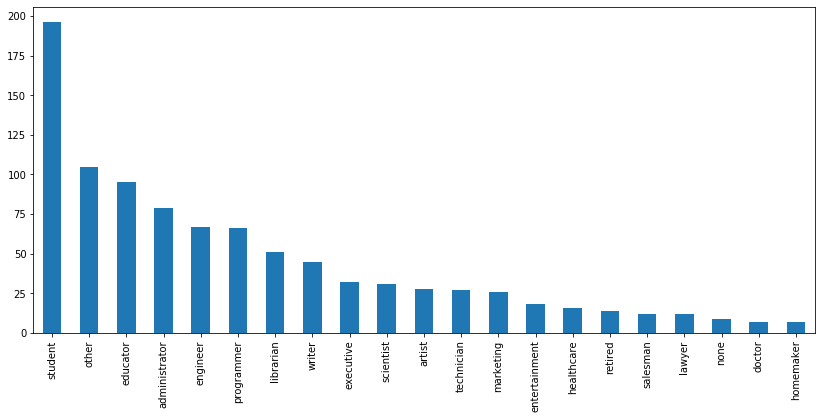

In [16]:
users['occupation'].value_counts().plot(kind='bar', figsize=(14, 6));

In [0]:
ratings['user_id'] = ratings['user_id'].astype('object')
ratings['movie_id'] = ratings['movie_id'].astype('object')
ratings['rating'] = ratings['rating'].astype(np.int8)

ratings.drop(columns=['unix_timestamp'], inplace=True)

In [0]:
# 'unknown' column only contain only two '1'
items.drop(columns=['release date', 'video release date', 'IMDb URL', 'unknown'],
           inplace=True)

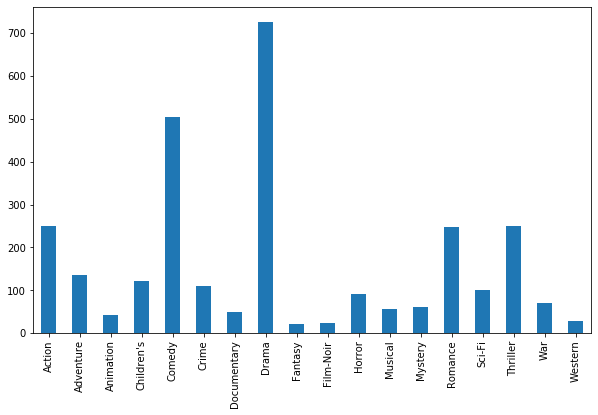

In [25]:
items.iloc[:, 2:].sum().plot(kind='bar', figsize=(10, 6));

In [0]:
items[items.columns[2:]] = items[items.columns[2:]].astype(np.int8)

In [30]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 20 columns):
movie id       1682 non-null int64
movie title    1682 non-null object
Action         1682 non-null int8
Adventure      1682 non-null int8
Animation      1682 non-null int8
Children's     1682 non-null int8
Comedy         1682 non-null int8
Crime          1682 non-null int8
Documentary    1682 non-null int8
Drama          1682 non-null int8
Fantasy        1682 non-null int8
Film-Noir      1682 non-null int8
Horror         1682 non-null int8
Musical        1682 non-null int8
Mystery        1682 non-null int8
Romance        1682 non-null int8
Sci-Fi         1682 non-null int8
Thriller       1682 non-null int8
War            1682 non-null int8
Western        1682 non-null int8
dtypes: int64(1), int8(18), object(1)
memory usage: 56.0+ KB


In [33]:
items.head(3)

,movie id,movie title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
def df2dict(df):
    id2movie, movie2id, id2feature = {}, {}, {}
    for idx in df.index:
        id2movie[df.iloc[idx, 0]] = df.iloc[idx, 1]
        movie2id[df.iloc[idx, 1]] = df.iloc[idx, 0]
        id2feature[df.iloc[idx, 0]] = np.array(df.iloc[idx, 2:].values, dtype=np.int8)

    return id2movie, movie2id, id2feature

id2movie, movie2id, id2feature = df2dict(items)

In [35]:
print(id2movie[1], movie2id['Toy Story (1995)'], id2feature[1], sep='\n')

Toy Story (1995)
1
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [79]:
n_users = users.shape[0]
n_items = items.shape[0]

ui_matrix = np.zeros((n_users, n_items), dtype=np.int8) # user-item matrix

for (_, user_id, item_id, rating) in ratings.itertuples():
    ui_matrix[user_id-1, item_id-1] = rating
    
ui_matrix

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int8)

In [81]:
gb = ratings.groupby(['user_id'])['rating'].count().astype(np.int32)
top_users = gb.sort_values(ascending=False)[:20]

gb = ratings.groupby(['movie_id'])['rating'].count().astype(np.int32)
top_movies = gb.sort_values(ascending=False)[:20]

joined_df = ratings.join(top_users, how='inner', on='user_id', rsuffix='_r').astype(np.int32)
joined_df = joined_df.join(top_movies, how='inner', on='movie_id', rsuffix='_r').astype(np.int32)

# sub-set of 'ui_matrix'
pd.crosstab(joined_df.user_id, joined_df.movie_id, joined_df.rating, aggfunc=np.sum) 

movie_id,1,7,50,56,98,100,117,121,127,172,174,181,222,237,258,286,288,294,300,313
user_id,,,,,,,,,,,,,,,,,,,,
7,NaN,5.0,5.0,5.0,4.0,5.0,NaN,5.0,5.0,4.0,5.0,3.0,NaN,5.0,4.0,4.0,4.0,1.0,4.0,NaN
13,3.0,2.0,5.0,5.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,4.0,3.0,1.0,2.0,1.0,4.0
92,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,4.0,5.0,4.0,4.0,4.0,4.0,NaN,3.0,3.0,NaN,5.0
94,4.0,4.0,5.0,5.0,4.0,5.0,NaN,2.0,5.0,4.0,4.0,4.0,3.0,NaN,5.0,4.0,3.0,NaN,NaN,4.0
181,3.0,4.0,NaN,NaN,NaN,3.0,2.0,4.0,NaN,NaN,NaN,NaN,4.0,5.0,3.0,1.0,4.0,2.0,3.0,NaN
234,3.0,2.0,4.0,3.0,4.0,4.0,2.0,NaN,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0
276,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,4.0,4.0,4.0,5.0
279,3.0,5.0,3.0,4.0,NaN,4.0,5.0,4.0,NaN,2.0,4.0,3.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN
293,2.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0


In [0]:
from sklearn.metrics import pairwise_distances as distance
import seaborn as sns

In [0]:
user_similarity = distance(ui_matrix, metric='cosine', n_jobs=-1)
item_similarity = distance(ui_matrix.T, metric='cosine', n_jobs=-1)

In [48]:
user_similarity = user_similarity.astype(np.float16)
user_similarity

array([[0.    , 0.833 , 0.9526, ..., 0.8516, 0.8203, 0.602 ],
       [0.833 , 0.    , 0.8896, ..., 0.8384, 0.8276, 0.894 ],
       [0.9526, 0.8896, 0.    , ..., 0.899 , 0.8667, 0.9736],
       ...,
       [0.8516, 0.8384, 0.899 , ..., 0.    , 0.8984, 0.905 ],
       [0.8203, 0.8276, 0.8667, ..., 0.8984, 0.    , 0.8174],
       [0.602 , 0.894 , 0.9736, ..., 0.905 , 0.8174, 0.    ]],
      dtype=float16)

In [49]:
user_similarity[:4, :4]

array([[0.    , 0.833 , 0.9526, 0.9355],
       [0.833 , 0.    , 0.8896, 0.822 ],
       [0.9526, 0.8896, 0.    , 0.656 ],
       [0.9355, 0.822 , 0.656 , 0.    ]], dtype=float16)

In [75]:
joined_df

,user_id,movie_id,rating,rating_r,rating_r
5815,303,181,5,484,507
38081,234,181,3,480,507
12941,308,181,4,397,507
740,276,181,5,518,507
11212,7,181,3,403,507
...,...,...,...,...,...
89433,405,313,4,737,350
34242,416,313,5,493,350
35612,450,313,5,540,350
33278,537,313,4,490,350


In [77]:
ui_matrix[302][180]

5

In [78]:
ui_matrix[6][299]

4